# Valorant EDA Pros vs In-Game LeaderBoard

### Imports and DataSet Definitions

Notes:
- c9 yay had the most kills in champs22 by a long shot. he is also 30th in df_pros_all_time
- player name columns have 2 spaces in between name and team

In [348]:
import pandas as pd
import numpy as np

In [349]:
df_champs22:pd.DataFrame = pd.read_pickle("./data/df_champs22_clean")
df_leaderboards:pd.DataFrame = pd.read_pickle("./data/df_leaderboards_clean")
df_pros_all_time:pd.DataFrame = pd.read_pickle("./data/df_pros_all_time_clean")
pd.set_option('display.max_columns', None)


### Winners

In [350]:
final_standings = {
    "first": ["pANcada", "Sacy", "Saadhak", "aspas", "Less"],  # LOUD
    "second": ["FNS", "Victor", "crashies", "yay", "Marved"],  # Optic Gaming
    "third": ["stax", "Rb", "Zest", "BuZz", "MaKo"],  # DRX
    "fouth": ["ANGE1", "Shao", "Zyppan", "SUYGETSU", "ardiis"]  # FPX
}
# source: https://liquipedia.net/valorant/VCT/2022/Champions


### Data Exploration

In [351]:
df_pros_all_time.iloc[30].player

'yay  C9'

In [352]:
df_pros_all_time.describe()

,rnd,r,acs,k:d,kast,adr,kpr,apr,fkpr,fdpr,hs_pct,cl_pct,kmax,k,d,a,fk,fd
count,4488.000000,4488.000000,4488.000000,4488.000000,4364.00000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4486.000000,4431.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000
mean,1243.442736,0.872157,190.549332,0.886370,66.92209,124.600245,0.659713,0.244969,0.091767,0.106205,23.910834,12.889190,26.124109,859.442513,900.619430,317.556595,121.332665,126.650401
std,1294.948209,0.191350,23.574630,0.144835,4.79441,14.726199,0.086633,0.061276,0.037990,0.035422,4.435499,4.398045,5.421932,945.933479,904.554573,361.031489,150.453990,136.993847
min,200.000000,0.000000,102.900000,0.400000,35.00000,0.000000,0.350000,0.070000,0.020000,0.000000,11.000000,1.000000,9.000000,75.000000,110.000000,15.000000,4.000000,0.000000
25%,352.000000,0.810000,175.100000,0.790000,64.00000,115.100000,0.600000,0.200000,0.060000,0.080000,21.000000,10.000000,22.000000,220.000000,271.000000,80.000000,28.000000,37.000000
50%,695.000000,0.900000,189.700000,0.880000,67.00000,124.200000,0.660000,0.240000,0.080000,0.100000,24.000000,13.000000,26.000000,457.500000,524.000000,170.000000,60.000000,72.000000
75%,1655.750000,0.980000,205.100000,0.980000,70.00000,134.000000,0.710000,0.290000,0.110000,0.130000,27.000000,16.000000,30.000000,1137.000000,1207.000000,415.000000,152.250000,167.000000
max,7952.000000,1.350000,300.000000,1.530000,87.00000,184.800000,1.030000,0.470000,0.250000,0.270000,42.000000,36.000000,49.000000,5959.000000,5898.000000,2568.000000,1175.000000,1101.000000


<AxesSubplot: xlabel='r', ylabel='k'>

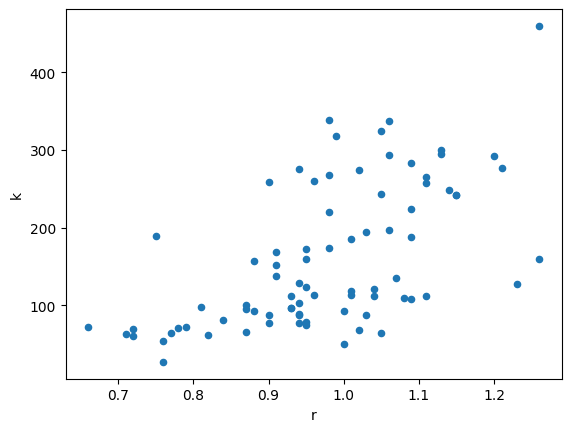

In [353]:
df_champs22.plot(x="r", y="k", kind="scatter")

### Champs22 attendees all_time stats

In [354]:

df_champs22_pros_all_time = df_pros_all_time[df_pros_all_time.player.isin(df_champs22.player)]


### how does the top ten of champs performance compare to there all time performance

notes:
- interestingly the avg kmax at champs was drastically lower then there all time stats. probably due to skill disparity in ranked compared to an actual tournament

In [355]:
df_champs22[:10]

,player,rnd,r,acs,k:d,kast,adr,kpr,apr,fkpr,fdpr,hs_pct,cl_pct,kmax,k,d,a,fk,fd
0,yay C9,492,1.26,254.6,1.50,73,159.8,0.93,0.09,0.20,0.08,26,15.0,30,460,306,42,96,40
1,kiNgg LEV,179,1.26,260.0,1.36,77,160.9,0.89,0.30,0.23,0.12,23,11.0,26,159,117,53,42,21
2,Laz ZETA,148,1.23,245.0,1.31,71,156.1,0.86,0.21,0.15,0.09,28,20.0,25,128,98,31,22,14
3,pANcada SEN,366,1.21,210.5,1.25,78,137.5,0.76,0.39,0.08,0.04,34,15.0,21,277,221,143,29,16
4,Derke FNC,319,1.20,247.9,1.39,70,166.2,0.92,0.13,0.17,0.15,34,21.0,31,292,210,42,53,47
5,Shao NAVI,357,1.15,194.5,1.12,80,133.7,0.68,0.43,0.04,0.04,30,16.0,28,242,216,155,14,15
6,Cryocells 100T,285,1.15,232.2,1.27,71,143.4,0.85,0.13,0.18,0.13,24,19.0,26,242,191,36,50,36
7,Sacy SEN,366,1.14,194.0,1.14,77,127.5,0.68,0.41,0.07,0.05,25,12.0,32,248,217,151,27,17
8,MaKo DRX,416,1.13,207.8,1.14,78,135.9,0.72,0.43,0.07,0.07,29,14.0,28,300,263,179,29,28
9,Less LOUD,366,1.13,219.9,1.31,71,142.6,0.81,0.17,0.10,0.10,25,21.0,27,295,226,63,37,37


In [356]:
df_champs22_pros_all_time[:10]

,player,rnd,r,acs,k:d,kast,adr,kpr,apr,fkpr,fdpr,hs_pct,cl_pct,kmax,k,d,a,fk,fd
21,Sacy SEN,3574,1.20,230.8,1.29,78.0,150.0,0.81,0.37,0.10,0.06,26.0,16.0,32,2883,2243,1323,344,214
26,MaKo DRX,2799,1.19,220.3,1.24,78.0,141.3,0.77,0.39,0.08,0.08,26.0,17.0,31,2153,1737,1088,237,211
30,yay C9,5035,1.18,244.5,1.29,71.0,153.1,0.87,0.16,0.19,0.11,26.0,14.0,40,4381,3386,817,933,578
34,aspas LOUD,2221,1.18,249.9,1.28,74.0,157.7,0.87,0.20,0.16,0.12,26.0,19.0,32,1936,1515,435,351,264
39,f0rsakeN PRX,5302,1.17,261.7,1.25,73.0,164.0,0.91,0.22,0.19,0.15,26.0,17.0,33,4833,3863,1158,1014,791
47,ScreaM KCORP,5020,1.16,255.3,1.27,74.0,162.7,0.88,0.22,0.16,0.11,33.0,13.0,39,4435,3497,1121,817,559
51,Cryocells 100T,4249,1.16,238.7,1.27,73.0,148.9,0.87,0.17,0.15,0.11,24.0,17.0,35,3681,2890,722,655,458
52,Shao NAVI,5407,1.16,219.9,1.26,77.0,140.9,0.78,0.32,0.08,0.06,28.0,18.0,43,4199,3345,1742,418,270
65,Derke FNC,4671,1.14,256.9,1.23,71.0,159.1,0.89,0.19,0.21,0.17,27.0,18.0,46,4144,3382,888,995,794
73,BuZz DRX,3305,1.14,237.0,1.21,73.0,149.3,0.83,0.20,0.17,0.13,25.0,19.0,36,2735,2262,658,555,430


below is subset of players who are in *both* top ten champs22 attendees and all time stats of those who attended champs22
now this in itself is fairly obvious. but the key here is that most of these players have since changed teams. what could that say about future championships attendees? could this mean that the below teams have a high chance of attending champs23?

regardless the current teams there are playing on are strong competitors (SEN,DRX,C9,100T,FNC).

In [357]:
df_champs22_pros_all_time[:10][df_champs22_pros_all_time[:10].player.isin(df_champs22[:10].player)]

,player,rnd,r,acs,k:d,kast,adr,kpr,apr,fkpr,fdpr,hs_pct,cl_pct,kmax,k,d,a,fk,fd
21,Sacy SEN,3574,1.20,230.8,1.29,78.0,150.0,0.81,0.37,0.10,0.06,26.0,16.0,32,2883,2243,1323,344,214
26,MaKo DRX,2799,1.19,220.3,1.24,78.0,141.3,0.77,0.39,0.08,0.08,26.0,17.0,31,2153,1737,1088,237,211
30,yay C9,5035,1.18,244.5,1.29,71.0,153.1,0.87,0.16,0.19,0.11,26.0,14.0,40,4381,3386,817,933,578
51,Cryocells 100T,4249,1.16,238.7,1.27,73.0,148.9,0.87,0.17,0.15,0.11,24.0,17.0,35,3681,2890,722,655,458
52,Shao NAVI,5407,1.16,219.9,1.26,77.0,140.9,0.78,0.32,0.08,0.06,28.0,18.0,43,4199,3345,1742,418,270
65,Derke FNC,4671,1.14,256.9,1.23,71.0,159.1,0.89,0.19,0.21,0.17,27.0,18.0,46,4144,3382,888,995,794


### stats for placement in champs22

im curious to see how 1st place stats compared 2nd or 3rd or 4th

need to add categorical to df_champs22 according to dict at the top

In [358]:
df_champs22["champs22_placement"] = np.nan
df_champs22_pros_all_time["champs22_placement"] = np.nan
df_leaderboards["champs22_placement"] = np.nan

/var/folders/c3/5pdm4hrd4tdc_6s74qn93l8m0000gn/T/ipykernel_2996/3636726604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs22_pros_all_time["champs22_placement"] = np.nan


In [359]:
for place,names in final_standings.items():
    for name in names:
        df_champs22.champs22_placement.loc[df_champs22.player.str.contains(name,case=False)] = place
df_champs22[:20]        

/var/folders/c3/5pdm4hrd4tdc_6s74qn93l8m0000gn/T/ipykernel_2996/3036655527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs22.champs22_placement.loc[df_champs22.player.str.contains(name,case=False)] = place


,player,rnd,r,acs,k:d,kast,adr,kpr,apr,fkpr,fdpr,hs_pct,cl_pct,kmax,k,d,a,fk,fd,champs22_placement
0,yay C9,492,1.26,254.6,1.50,73,159.8,0.93,0.09,0.20,0.08,26,15.0,30,460,306,42,96,40,second
1,kiNgg LEV,179,1.26,260.0,1.36,77,160.9,0.89,0.30,0.23,0.12,23,11.0,26,159,117,53,42,21,NaN
2,Laz ZETA,148,1.23,245.0,1.31,71,156.1,0.86,0.21,0.15,0.09,28,20.0,25,128,98,31,22,14,NaN
3,pANcada SEN,366,1.21,210.5,1.25,78,137.5,0.76,0.39,0.08,0.04,34,15.0,21,277,221,143,29,16,first
4,Derke FNC,319,1.20,247.9,1.39,70,166.2,0.92,0.13,0.17,0.15,34,21.0,31,292,210,42,53,47,NaN
5,Shao NAVI,357,1.15,194.5,1.12,80,133.7,0.68,0.43,0.04,0.04,30,16.0,28,242,216,155,14,15,fouth
6,Cryocells 100T,285,1.15,232.2,1.27,71,143.4,0.85,0.13,0.18,0.13,24,19.0,26,242,191,36,50,36,NaN
7,Sacy SEN,366,1.14,194.0,1.14,77,127.5,0.68,0.41,0.07,0.05,25,12.0,32,248,217,151,27,17,first
8,MaKo DRX,416,1.13,207.8,1.14,78,135.9,0.72,0.43,0.07,0.07,29,14.0,28,300,263,179,29,28,third
9,Less LOUD,366,1.13,219.9,1.31,71,142.6,0.81,0.17,0.10,0.10,25,21.0,27,295,226,63,37,37,first


In [360]:
for place,names in final_standings.items():
    for name in names:
        df_champs22_pros_all_time.champs22_placement.loc[df_champs22_pros_all_time.player.str.contains(name,case=False)] = place
df_champs22_pros_all_time[:20]     

/var/folders/c3/5pdm4hrd4tdc_6s74qn93l8m0000gn/T/ipykernel_2996/866249794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs22_pros_all_time.champs22_placement.loc[df_champs22_pros_all_time.player.str.contains(name,case=False)] = place


,player,rnd,r,acs,k:d,kast,adr,kpr,apr,fkpr,fdpr,hs_pct,cl_pct,kmax,k,d,a,fk,fd,champs22_placement
21,Sacy SEN,3574,1.20,230.8,1.29,78.0,150.0,0.81,0.37,0.10,0.06,26.0,16.0,32,2883,2243,1323,344,214,first
26,MaKo DRX,2799,1.19,220.3,1.24,78.0,141.3,0.77,0.39,0.08,0.08,26.0,17.0,31,2153,1737,1088,237,211,third
30,yay C9,5035,1.18,244.5,1.29,71.0,153.1,0.87,0.16,0.19,0.11,26.0,14.0,40,4381,3386,817,933,578,second
34,aspas LOUD,2221,1.18,249.9,1.28,74.0,157.7,0.87,0.20,0.16,0.12,26.0,19.0,32,1936,1515,435,351,264,first
39,f0rsakeN PRX,5302,1.17,261.7,1.25,73.0,164.0,0.91,0.22,0.19,0.15,26.0,17.0,33,4833,3863,1158,1014,791,NaN
47,ScreaM KCORP,5020,1.16,255.3,1.27,74.0,162.7,0.88,0.22,0.16,0.11,33.0,13.0,39,4435,3497,1121,817,559,NaN
51,Cryocells 100T,4249,1.16,238.7,1.27,73.0,148.9,0.87,0.17,0.15,0.11,24.0,17.0,35,3681,2890,722,655,458,NaN
52,Shao NAVI,5407,1.16,219.9,1.26,77.0,140.9,0.78,0.32,0.08,0.06,28.0,18.0,43,4199,3345,1742,418,270,fouth
65,Derke FNC,4671,1.14,256.9,1.23,71.0,159.1,0.89,0.19,0.21,0.17,27.0,18.0,46,4144,3382,888,995,794,NaN
73,BuZz DRX,3305,1.14,237.0,1.21,73.0,149.3,0.83,0.20,0.17,0.13,25.0,19.0,36,2735,2262,658,555,430,third


In [361]:
df_champs22.champs22_placement.fillna("none", inplace=True)
df_champs22.champs22_placement = df_champs22.champs22_placement.astype(
    "category")
df_champs22_pros_all_time.champs22_placement.fillna("none", inplace=True)
df_champs22_pros_all_time.champs22_placement=df_champs22_pros_all_time.champs22_placement.astype("category")


/var/folders/c3/5pdm4hrd4tdc_6s74qn93l8m0000gn/T/ipykernel_2996/2838009932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs22_pros_all_time.champs22_placement.fillna("none", inplace=True)
/var/folders/c3/5pdm4hrd4tdc_6s74qn93l8m0000gn/T/ipykernel_2996/2838009932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs22_pros_all_time.champs22_placement=df_champs22_pros_all_time.champs22_placement.astype("category")


In [362]:
df_champs22[df_champs22.champs22_placement != "none"].groupby(by="champs22_placement").hs_pct.mean()

champs22_placement
first     25.8
fouth     29.0
none       NaN
second    25.4
third     30.2
Name: hs_pct, dtype: float64

In [363]:
df_champs22_pros_all_time[df_champs22_pros_all_time.champs22_placement != "none"].groupby(by="champs22_placement").hs_pct.mean()

champs22_placement
first     24.6
fouth     27.0
none       NaN
second    24.6
third     27.4
Name: hs_pct, dtype: float64

nothing too crazy here. first and second place had notibly lower hs_pct's. now that i think of it thats kinda odd that yay had and absurd amount of kills compared to everyone else. an idea that comes to mind is that there team play and kill-trading might just be so much better. not enough data to reach a conclusion tho.

### compare hs_pct's(all time) to leaderboards

In [364]:
hs_pcts = {}
hs_pcts["top 10"] = df_leaderboards.loc[0:9].hs_pct.mean()
hs_pcts["top 100"] = df_leaderboards.loc[0:99].hs_pct.mean()
hs_pcts["top 500"] = df_leaderboards.loc[0:499].hs_pct.mean()

hs_pcts

{'top 10': 25.3, 'top 100': 25.368999999999996, 'top 500': 24.21244979919679}

In [365]:
hs_pcts = {}
hs_pcts["top 10"] = df_leaderboards.sort_values(by="acs", ascending=False)[0:9].hs_pct.mean()
hs_pcts["top 100"] = df_leaderboards.sort_values(by="acs", ascending=False)[0:99].hs_pct.mean()
hs_pcts["top 500"] = df_leaderboards.sort_values(by="acs", ascending=False)[0:499].hs_pct.mean()

hs_pcts

{'top 10': 31.088888888888885,
 'top 100': 27.863636363636363,
 'top 500': 27.370541082164326}

In [366]:
hs_pcts = {}
hs_pcts["top 10"] = df_leaderboards.sort_values(by="aces", ascending=False)[0:9].hs_pct.mean()
hs_pcts["top 100"] = df_leaderboards.sort_values(by="aces", ascending=False)[0:99].hs_pct.mean()
hs_pcts["top 500"] = df_leaderboards.sort_values(by="aces", ascending=False)[0:499].hs_pct.mean()

hs_pcts

{'top 10': 28.75555555555555,
 'top 100': 27.25959595959596,
 'top 500': 26.38196392785571}

In [367]:
df_leaderboards.sort_values("aces",ascending=False).head()

,region,name,tag,rank,adr,headshots,hs_pct,aces,clutches,flawless,k,d,a,k:d,kpr,kmax,acs,wins,win_pct,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,champs22_placement
32688,EU,Tronix,#WNG,Immortal 2,193.4,1766,30.3,24,206,111,2553,1889,393,1.35,1.1,57,302.3,62,54.9,Chamber,Reyna,Jett,Vandal,43,54,3,1382,Operator,8,89,3,141,Sheriff,58,42,0,104,NaN
16238,NA,Ugh,#HELLO,Immortal 2,193.7,2712,37.5,20,191,124,3191,2056,500,1.55,1.0,41,290.1,99,67.8,Raze,Sage,Jett,Vandal,55,41,4,1835,Guardian,85,14,1,355,Phantom,47,50,3,203,NaN
12928,NA,Yuni,#1738,Immortal 1,155.2,2847,17.8,20,458,241,5548,4902,1633,1.13,0.8,36,237.7,168,52.7,Jett,Chamber,Reyna,Vandal,26,69,5,1778,Phantom,22,72,6,938,Operator,6,93,1,463,NaN
68424,AP,Serse,#ToT,Immortal 1,152.4,2478,33.3,19,279,158,3163,2983,537,1.06,0.8,34,238.4,92,51.1,Reyna,Jett,Fade,Vandal,46,51,3,2105,Spectre,29,68,3,304,Ghost,48,50,2,273,NaN
66692,AP,IPhone13 Pro Max,#0001,Immortal 1,191.5,5261,38.8,19,439,289,6016,4517,906,1.33,1.0,40,293.1,170,60.5,Reyna,Jett,Fade,Vandal,54,42,3,3845,Phantom,45,50,5,466,Bulldog,43,54,3,434,NaN


In [368]:
hs_pcts = {}
hs_pcts["top 10"] = df_leaderboards.sort_values(by="adr", ascending=False).loc[0:9].hs_pct.mean()
hs_pcts["top 100"] = df_leaderboards.sort_values(by="adr", ascending=False).loc[0:99].hs_pct.mean()
hs_pcts["top 500"] = df_leaderboards.sort_values(by="adr", ascending=False).loc[0:499].hs_pct.mean()

hs_pcts

df_leaderboards.sort_values(by="adr",ascending=False)

,region,name,tag,rank,adr,headshots,hs_pct,aces,clutches,flawless,k,d,a,k:d,kpr,kmax,acs,wins,win_pct,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,champs22_placement
68636,AP,CTT Joaxtacy,#0000,Immortal 1,340.6,44,36.3,3,4,1,56,25,7,2.24,1.9,56,545.9,1,100.0,Jett,none,none,Vandal,41,56,3,35,Sheriff,50,50,0,9,Ghost,0,0,0,0,NaN
8165,NA,PentaStorm,#NA1,Immortal 1,332.2,14,26.8,1,0,2,26,4,5,6.50,2.0,26,550.5,1,100.0,Sova,none,none,Phantom,21,64,15,14,Vandal,25,75,0,4,Classic,63,38,0,3,NaN
41405,EU,13396,#TR1,Unrated,323.4,28,20.9,0,3,0,36,17,10,2.12,1.6,36,466.6,1,100.0,Raze,none,none,Vandal,45,47,8,25,Judge,18,82,0,3,Phantom,20,80,0,3,NaN
48828,EU,Rias Gremory,#pong,Immortal 1,318.4,26,30.6,0,1,1,34,11,2,3.09,1.7,34,477.2,1,100.0,Chamber,none,none,Vandal,31,69,0,22,Classic,25,75,0,2,Phantom,67,33,0,2,NaN
50701,EU,Bot Zinboo,#EUW,Immortal 1,285.1,16,22.5,0,3,1,32,13,5,2.46,1.7,32,480.2,1,100.0,Jett,none,none,Operator,11,89,0,9,Vandal,22,78,0,6,Shorty,20,52,28,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76060,BR,Kaisa e Vayne,#BR1,Immortal 1,17.1,1,33.3,0,0,0,1,5,0,0.20,0.1,1,18.6,0,0.0,Killjoy,none,none,Vandal,33,67,0,1,Ghost,0,0,0,0,Classic,0,0,0,0,NaN
64506,AP,Marshmello#1 tap,none,Immortal 1,12.6,1,50.0,0,1,0,1,6,0,0.17,0.1,1,21.2,0,0.0,Breach,none,none,Vandal,100,0,0,1,Ghost,0,0,0,0,Classic,0,0,0,0,NaN
2146,NA,Espada,#val,Immortal 1,7.3,1,20.0,0,2,1,1,10,1,0.10,0.0,1,12.4,0,0.0,Omen,none,none,Ghost,100,0,0,1,Classic,0,0,0,0,Frenzy,0,0,0,0,NaN
44735,EU,FNSL w0zinn,#turki,Immortal 1,1.4,0,0.0,0,0,0,0,4,0,0.00,0.0,0,1.4,0,0.0,Sage,none,none,Ghost,0,0,0,0,Classic,0,0,0,0,Vandal,0,0,0,0,NaN


what about hs_pct per rank?

,region,name,tag,adr,headshots,hs_pct,aces,clutches,flawless,k,d,a,k:d,kpr,kmax,acs,wins,win_pct,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,champs22_placement
rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bronze 2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Bronze 3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
Diamond 1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Diamond 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
Diamond 3,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,0
Gold 1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
Gold 2,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Gold 3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
Immortal 1,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,50622,0


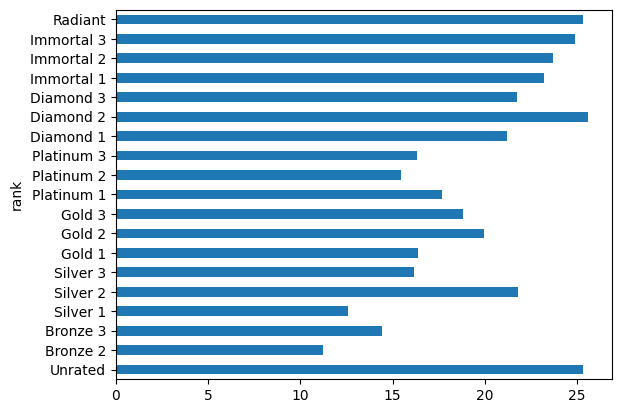

In [369]:
hs_pct_rank = df_leaderboards.groupby(by="rank").hs_pct.mean()
hs_pct_rank = hs_pct_rank.reindex(["Unrated","Bronze 2","Bronze 3","Silver 1","Silver 2","Silver 3","Gold 1","Gold 2","Gold 3","Platinum 1","Platinum 2","Platinum 3","Diamond 1","Diamond 2","Diamond 3","Immortal 1","Immortal 2","Immortal 3","Radiant"])
hs_pct_rank.plot(kind="barh")
df_leaderboards.groupby("rank").count()

~~ok so that chart to me as a player is verrrrrrrryyy interesting. because it is well known that smurfs (players who create other accounts to play at a lower rank) are an extremely common virus at the lower ranks. and you can clearly see that silver 2's average hs% is much better than other silvers hell even better than diamond 1!!!!! thats insane! even more so when you take into account that there are MUCH more silvers than there are diamonds to water down the hs%.~~

~~another key give away of smurfs. is the hs% of unrated. that to me screams smurf~~

scratch that im wrong

so i ran into something as i was looking into the data. players with more aces seemed to have much higher win rates. which seems obvious but interestingly there hs% was also much higher. so im ganna dive into this a bit more and then look into agent stats & weapon stats

### aces = wins??

In [370]:
df_leaderboards.head()

,region,name,tag,rank,adr,headshots,hs_pct,aces,clutches,flawless,k,d,a,k:d,kpr,kmax,acs,wins,win_pct,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,champs22_placement
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,1506,1408,703,1.07,0.7,29,208.8,59,59.6,Fade,Viper,Omen,Vandal,35,59,5,802,Phantom,33,62,5,220,Classic,36,60,3,147,NaN
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,1608,1187,206,1.35,1.0,32,270.6,52,65.8,Chamber,Jett,Raze,Vandal,41,56,3,689,Operator,8,91,0,226,Phantom,32,63,5,137,NaN
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,1115,1064,267,1.05,0.8,39,227.8,42,65.6,Yoru,Jett,Chamber,Vandal,38,57,4,444,Phantom,36,61,3,231,Operator,8,91,1,102,NaN
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,1134,812,157,1.40,1.0,37,277.0,32,62.8,Jett,Chamber,KAY/O,Vandal,51,47,2,754,Sheriff,48,51,1,48,Phantom,44,56,0,36,NaN
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,869,781,213,1.11,0.8,29,230.9,32,62.8,Jett,Raze,Chamber,Vandal,36,60,4,419,Spectre,21,71,8,65,Operator,8,92,0,64,NaN


<AxesSubplot: xlabel='aces', ylabel='win_pct'>

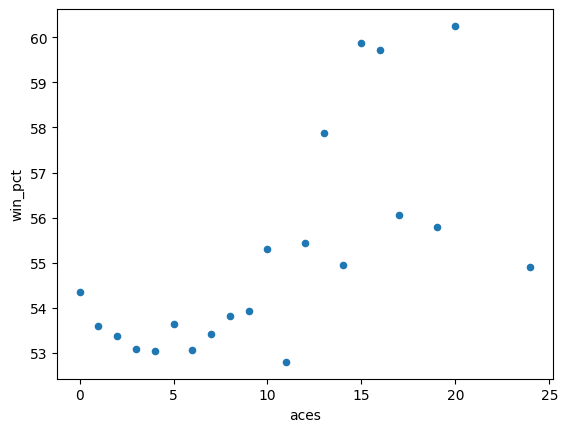

In [371]:

avg_win_rate_to_aces = df_leaderboards.groupby(by=["aces"],as_index=False).agg({"win_pct": pd.Series.mean})
avg_win_rate_to_aces.plot(x="aces",y="win_pct",kind="scatter")

what about flawless and clutches?

<AxesSubplot: xlabel='flawless', ylabel='win_pct'>

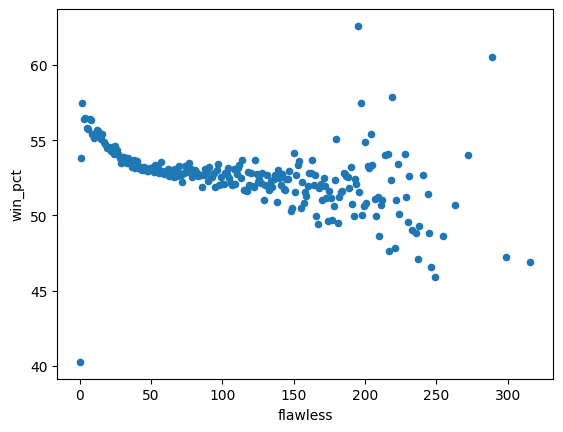

In [375]:

avg_win_rate_to_flawless = df_leaderboards.groupby(by=["flawless"],as_index=False).agg({"win_pct": pd.Series.mean})
avg_win_rate_to_flawless.plot(x="flawless",y="win_pct",kind="scatter")

woooo.... thats weird.... almost as if the "flawless" number in df_leaderboards is counted only if the enemy team flawlesses you?? 

for some werid reason its saying the more flawless rounds you have the more of a chance you have of losing?????

now that is a notable find!

<AxesSubplot: xlabel='clutches', ylabel='win_pct'>

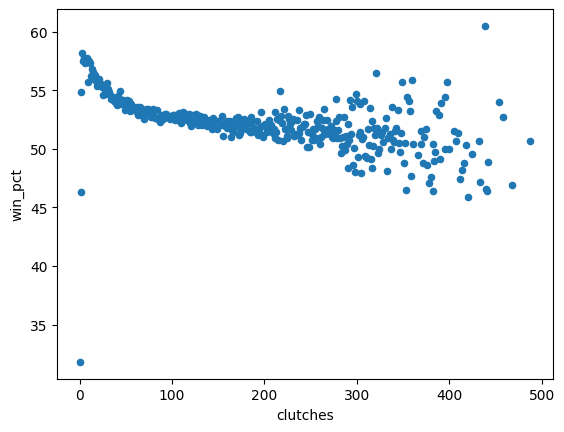

In [ ]:

avg_win_rate_to_clutches = df_leaderboards.groupby(by=["clutches"],as_index=False).agg({"win_pct": pd.Series.mean})
avg_win_rate_to_clutches.plot(x="clutches",y="win_pct",kind="scatter")

this one is makes a little bit more sense. it evens out after a certain point. kinda hinting at the fact that if your clutching less your winning more which makes sense this could me unfair matchups in ranked q or better teamwork so less need to clutch, or something else entirely 

### what about the agents?

In [382]:
df_leaderboards.sample()

,region,name,tag,rank,adr,headshots,hs_pct,aces,clutches,flawless,k,d,a,k:d,kpr,kmax,acs,wins,win_pct,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,champs22_placement
1200,NA,stun,#ned,Immortal 1,167.1,316,19.2,2,53,37,599,459,134,1.31,0.9,32,260.2,22,73.3,Jett,Chamber,Raze,Vandal,27,68,4,194,Operator,4,92,4,111,Phantom,32,64,4,81,NaN


In [410]:
agents_win_pct = df_leaderboards.groupby("agent_1").agg({"win_pct": pd.Series.mean,"k": pd.Series.count})
agents_win_pct

,win_pct,k
agent_1,,
Astra,54.763774,461
Breach,55.857191,591
Brimstone,54.987003,3370
Chamber,53.691058,19302
Cypher,53.661739,460
Fade,53.259742,5353
Jett,53.163216,11834
KAY/O,53.425947,1927
Killjoy,53.807742,620


,adr,agent_1
agent_1,,
Astra,136.191106,461
Breach,135.688494,591
Brimstone,134.095697,3370
Chamber,143.964822,19302
Cypher,135.161304,460
Fade,138.264917,5353
Jett,149.068498,11834
KAY/O,139.004515,1927
Killjoy,135.777097,620


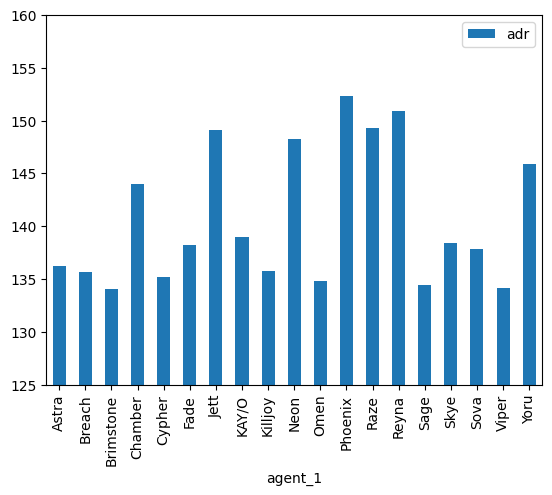

In [419]:
agents_avg_adr = df_leaderboards.groupby("agent_1",as_index=True).agg({"adr": pd.Series.mean,"agent_1": pd.Series.count})
agents_avg_adr.plot(y="adr",kind="bar",ylim=(125,160))
agents_avg_adr

### The Age Old Question: Phantom or Vandal

In [473]:
df_leaderboards.head()

,region,name,tag,rank,adr,headshots,hs_pct,aces,clutches,flawless,k,d,a,k:d,kpr,kmax,acs,wins,win_pct,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills,champs22_placement
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,1506,1408,703,1.07,0.7,29,208.8,59,59.6,Fade,Viper,Omen,Vandal,35,59,5,802,Phantom,33,62,5,220,Classic,36,60,3,147,NaN
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,1608,1187,206,1.35,1.0,32,270.6,52,65.8,Chamber,Jett,Raze,Vandal,41,56,3,689,Operator,8,91,0,226,Phantom,32,63,5,137,NaN
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,1115,1064,267,1.05,0.8,39,227.8,42,65.6,Yoru,Jett,Chamber,Vandal,38,57,4,444,Phantom,36,61,3,231,Operator,8,91,1,102,NaN
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,1134,812,157,1.40,1.0,37,277.0,32,62.8,Jett,Chamber,KAY/O,Vandal,51,47,2,754,Sheriff,48,51,1,48,Phantom,44,56,0,36,NaN
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,869,781,213,1.11,0.8,29,230.9,32,62.8,Jett,Raze,Chamber,Vandal,36,60,4,419,Spectre,21,71,8,65,Operator,8,92,0,64,NaN


In [472]:
weapons_avg_stats = df_leaderboards.groupby("gun1_name").agg({"adr": pd.Series.mean,"gun1_head": pd.Series.mean,"gun1_body": pd.Series.mean,"gun1_kills": pd.Series.mean})
weapons_avg_stats = weapons_avg_stats.iloc[[11,15]]
weapons_avg_stats

,adr,gun1_head,gun1_body,gun1_kills
gun1_name,,,,
Phantom,139.853742,30.061471,64.797854,253.455852
Vandal,143.307971,35.032619,60.655812,361.224556


looks like were going vandal from now on :D

### What is the weapon of choice for chamber and jetts?

since chamber and jett are viewed as the primary "opers" of the game (snipers). im curious to see what the leaderboards say

In [511]:
weapon_of_choice = df_leaderboards.groupby(["agent_1","gun1_name"]).agg({"gun1_name": pd.Series.count})
weapon_of_choice.loc[["Chamber","Jett"]]

gun1_name
agent_1 gun1_name           
Chamber Ares             1.0
        Bucky            NaN
        Bulldog          NaN
        Classic          1.0
        Frenzy           1.0
        Ghost            NaN
        Guardian         2.0
        Judge            6.0
        Marshal          NaN
        Odin             8.0
        Operator       242.0
        Phantom       1801.0
        Sheriff          1.0
        Shorty           NaN
        Spectre          5.0
        Vandal       17234.0
Jett    Ares             NaN
        Bucky            NaN
        Bulldog          NaN
        Classic          NaN
        Frenzy           NaN
        Ghost            4.0
        Guardian         NaN
        Judge            6.0
        Marshal          2.0
        Odin             3.0
        Operator       128.0
        Phantom        977.0
        Sheriff          3.0
        Shorty           2.0
        Spectre          3.0
        Vandal       10706.0